## Machine Learning: Regressão

Predição de valor de imóvel para a cidade de Boston

### 1º Importação dos dados

In [36]:
# Feito por: WESLEY MARCOS BORGES - GEC - 1651

# bibliotecas numericas numpy, pandas e para plot matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\Wesley\AppData\Local\Temp\ipykernel_9640\2395155834.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [37]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

#### Descrição dos objetos

In [38]:
print('Nomes das variáveis quantitativas (atributos)', diabetes_dataset.feature_names)
print()
print('Descrição', diabetes_dataset.DESCR)
print()
print('Variáveis quantitativas', diabetes_dataset.data)
print()
print('Variáveis qualitativas', diabetes_dataset.target)

Nomes das variáveis quantitativas (atributos) ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Descrição .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
   

In [39]:
# Transformação do dataset em dataframe do Pandas, procedimento necessário por se tratar de um método de regressão
dataset = pd.DataFrame(diabetes_dataset.data, columns = diabetes_dataset.feature_names)
print(dataset.head(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  


In [40]:
# Adição do target nesse dataframe
dataset['MEDV'] = diabetes_dataset.target

print(dataset.head(5))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6   MEDV  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0  


### 2º Visualização e divisão dos dados

#### Organizando dataset

In [41]:
# Divisão habitual dos conjuntos entre 'features/atributos' e 'targets/saidas'
array = dataset.values
print(type(array))
x = array[:,0:10]
y = array[:,10]

<class 'numpy.ndarray'>


In [42]:
# divisão automatica dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [43]:
print("Formato de X_train: ", X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de Y_train: ", Y_train.shape)
print("Formato de Y_test: ", Y_test.shape)

Formato de X_train:  (309, 10)
Formato de X_test:  (133, 10)
Formato de Y_train:  (309,)
Formato de Y_test:  (133,)


#### Visualizando dados

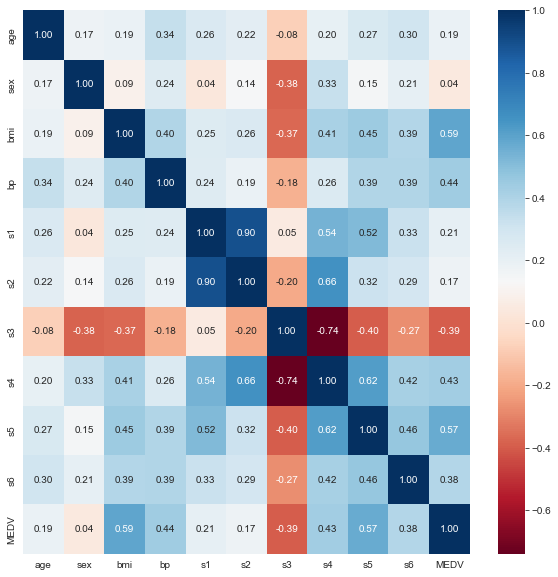

In [44]:
# Obtendo estatística de correlação
corr = dataset.corr()

# Gerando gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# Definindo labels do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va="center")

#show plt
plt.show()

### Mapa de correlações:

<p>Correlação variando sempre de -1 a 1.</p> 
<p>Correlações em maior intensidade de azul significam forte correlação entre atributos. </p>
<p>Correlações em maior intensidade de vermelho significam forte correlação inversa entre atributos.</p>

### 3º Aprendizado e Avaliação do modelo

In [45]:
# Importação de bibliotecas de funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Modelo Polinomial Regressional de 2ª ordem

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [47]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly, Y_train)

model_3 = LinearRegression()
model_3.fit(x_poly, Y_train)

LinearRegression()

In [48]:
print(X_train.shape)

(309, 10)


In [49]:
print(x_poly.shape)

(309, 286)


In [50]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_3 = cross_val_score(estimator=model_3, X=x_poly, y=Y_train, cv=10)

# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_3 = model_3.predict(x_poly)
r2_train_3 = r2_score(Y_train, y_pred_train_3)

y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
r2_test_3 = r2_score(Y_test, y_pred_test_3)

# Calculo de desempenho utilizando RMSE
rmse_3 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_3)))

In [51]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_3.mean())
print("R2 train: ", r2_train_3)
print("R2 test: ", r2_test_3)
print("RMSE: ", rmse_3)

Modelo Linear Regression
CV:  -71800.5032092125
R2 train:  0.8614051294103046
R2 test:  -683.4253347330813
RMSE:  2029.201580087986


In [52]:
#Fazendo a predição com o modelo polinomial
model_3.predict(x_poly)

array([132.,  60., 120.,  96.,  52., 168., 112., 244., 120., 172., 296.,
       176., 184.,  96., 148.,  56., 108., 184., 104., 280., 112., 116.,
       304.,  96., 184., 116., 148., 100.,  68., 292., 108., 320., 128.,
       200., 108., 100., 224.,  44., 112.,   4., 296., 100., 188., 132.,
       232., 176., 204.,  76., 112.,  64., 216., 256., 316., 208., 132.,
       172., 144.,  72.,  56.,  68.,  68., 120., 224.,   8.,  36.,  92.,
       216., 260., 124.,  64.,  68., 232., 196., 256.,  80.,  12.,  80.,
       244., 300., 116.,  48.,  88., 116., 244.,  80., 116.,  80.,  72.,
       276., 196., 268.,  52.,  52., 192., 152., 160.,  92., 136.,  32.,
       152., 116.,  88.,  48., 180., 156., 236., 220., 140., 224., 252.,
        96., 260., 160., 248.,  96.,  80., 140., 284., 276., 148.,  68.,
       196., 148., 184., 232.,  52., 124.,  84.,  24., 292.,  92., 164.,
        56., 212., 328., 116., 124., 164., 140., 240.,  88., 116., 324.,
       208.,  40., 276., 196., 176.,  56.,  52., 11